In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import random
import networkx as nx
from netgraph import Graph

In [2]:
# access stored data
%store -r Q
%store -r N
%store -r A

%store -r randomRewards
%store -r localNashRewards
%store -r NashQRewards

%store -r node_colors
%store -r edge_labels
%store -r G

In [3]:
# qtables_dict = {1: {'Q1': [[0.0, 0.0],[0.0, 0.0]], 'Q2': [[0.0, 0.0],[0.0, 0.0]], 'current_state': 0},2: {'Q1': [[1.0, 0.0],[0.0, 1.0]], 'Q2': [[1.0, 0.0],[0.0, 1.0]], 'current_state': 1}}
qtables_dict = {}

for i in range(1000):
    qtableS1 = [[random.randint(0,4), random.randint(0,4)], [random.randint(0,4), random.randint(0,4)]]
    qtableS2 = qtableS1
    qtableS3 = qtableS1
    qtableS4 = qtableS1
    qtables_dict[i] = {'Q1': [qtableS1, qtableS2, qtableS3, qtableS4], 'Q2': [qtableS1, qtableS2, qtableS3, qtableS4], 'current_state': i%4}

In [4]:
sns.set_theme()

# smooth the data
window = 100

# p0
cumsum = np.cumsum(randomRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
randomRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(localNashRewards[:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_0 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 0])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_0 = cumsum[window - 1:] / window

# p1
cumsum = np.cumsum(randomRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
randomRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(localNashRewards[:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
localNashRewardsSmooth_1 = cumsum[window - 1:] / window

cumsum = np.cumsum(NashQRewards[0][:, 1])
cumsum[window:] = cumsum[window:] - cumsum[:-window]
NashQRewardsSmooth_1 = cumsum[window - 1:] / window

# sum
randomRewardsSmooth_sum = randomRewardsSmooth_0 + randomRewardsSmooth_1
localNashRewardsSmooth_sum = localNashRewardsSmooth_0 + localNashRewardsSmooth_1
NashQRewardsSmooth_sum = NashQRewardsSmooth_0 + NashQRewardsSmooth_1

In [5]:
def plot_graph(G, node_colors, edge_labels, ax):
    Graph(G, node_labels=True, node_layout='circular', edge_labels=edge_labels,
    edge_label_fontdict=dict(size=5, fontweight='bold'), edge_layout='arc',
    node_size=6, edge_width=0.5, arrows=True, ax=ax, node_edge_color=node_colors, node_label_fontdict=dict(size=10), edge_label_position=0.2, edge_labels_rotate=False)

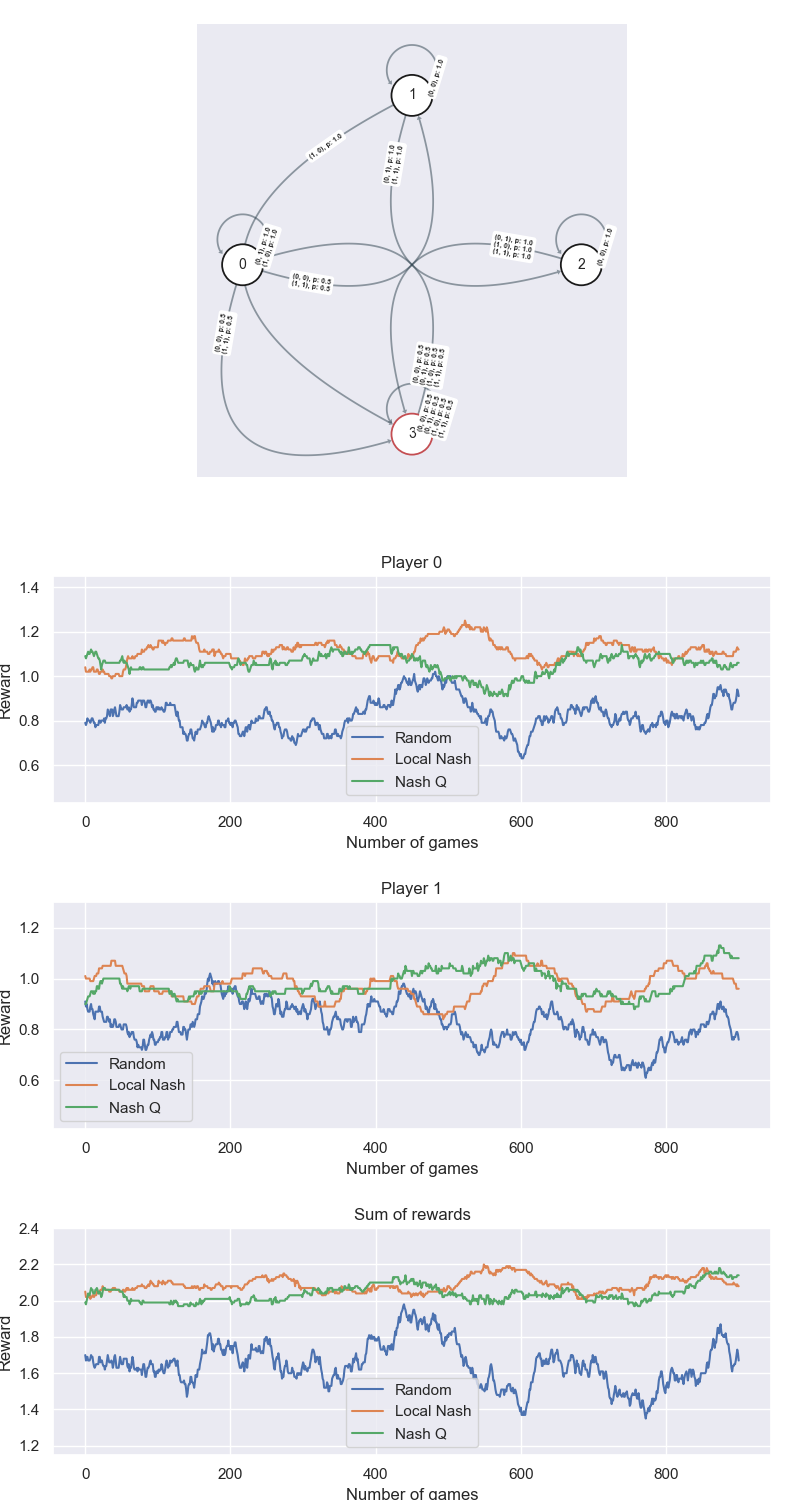

Output()

IntSlider(value=0, continuous_update=False, description='Game num:', max=900)

BoundedIntText(value=0, description='Enter Game num:', max=900)

Output()

In [9]:
%matplotlib widget

global old_line
old_line = []

fig, axs = plt.subplots(4, 1, figsize=(8, 15), gridspec_kw={'height_ratios': [2, 1, 1, 1]})
fig.tight_layout(h_pad=4)

%store -r node_colors
%store -r edge_labels
%store -r G
plot_graph(G, node_colors, edge_labels, axs[0])

axs[1].plot(randomRewardsSmooth_0, label="Random")
axs[1].plot(localNashRewardsSmooth_0, label="Local Nash")
axs[1].plot(NashQRewardsSmooth_0, label="Nash Q")
axs[1].set_title("Player 0")
axs[1].set_ylim(randomRewardsSmooth_0.min()-0.2, localNashRewardsSmooth_0.max()+0.2)
axs[1].set_xlabel("Number of games")
axs[1].set_ylabel("Reward")
axs[1].legend()

axs[2].plot(randomRewardsSmooth_1, label="Random")
axs[2].plot(localNashRewardsSmooth_1, label="Local Nash")
axs[2].plot(NashQRewardsSmooth_1, label="Nash Q")
axs[2].set_title("Player 1")
axs[2].set_ylim(randomRewardsSmooth_1.min()-0.2, localNashRewardsSmooth_1.max()+0.2)
axs[2].set_xlabel("Number of games")
axs[2].set_ylabel("Reward")
axs[2].legend()

axs[3].plot(randomRewardsSmooth_sum, label="Random")
axs[3].plot(localNashRewardsSmooth_sum, label="Local Nash")
axs[3].plot(NashQRewardsSmooth_sum, label="Nash Q")
axs[3].set_title("Sum of rewards")
axs[3].set_ylim(randomRewardsSmooth_sum.min()-0.2, localNashRewardsSmooth_sum.max()+0.2)
axs[3].set_xlabel("Number of games")
axs[3].set_ylabel("Reward")
axs[3].legend()

plt.show()

def update_display(game_num):
    current_state = qtables_dict[game_num]['current_state']
    for state in node_colors:
        if state == current_state:
            node_colors[state] = 'r'
        else:
            node_colors[state] = 'k'
    plot_graph(G, node_colors, edge_labels, axs[0])
    Q1 = qtables_dict[game_num]['Q1']
    Q2 = qtables_dict[game_num]['Q2']
    

def on_value_change(change):
    global old_line
    # print vertical red line in all subplots at the selected game number
    with out:
        # remove previous vertical line
        if not old_line == []:
            for line in old_line:
                line.remove()
            old_line.clear()
        for ax in [axs[1], axs[2], axs[3]]:
            line = ax.axvline(x=change['new'], color='r', linestyle='--')
            old_line.append(line)
            ax.plot()
    update_display(change['new'])
    with output_widget:
        output_widget.clear_output(True)
        print("Q-tables player 1:\n")
        for q in qtables_dict[change['new']]['Q1']:
            print(q)
            print("\n")
        print("Q-tables player 2:\n")
        for q in qtables_dict[change['new']]['Q2']:
            print(q)
            print("\n")

# create slider with length of the NashQ rewards array
out = widgets.Output()

slider = widgets.IntSlider(value=0, min=0, max=NashQRewardsSmooth_0.size-1, step=1, description='Game num:', continuous_update=False, readout=True, readout_format='d')
slider.observe(on_value_change, names='value')

txt_in = widgets.BoundedIntText(value=0, min=0, max=NashQRewardsSmooth_0.size-1, step=1, description='Enter Game num:', disabled=False)
txt_in.observe(on_value_change, names='value')

widgets.jslink((slider, 'value'), (txt_in, 'value'))

output_widget = widgets.Output()

display(out, slider, txt_in, output_widget)